Chapter 17

# 主元回归
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
# !pip install yfinance

In [2]:
# initializations
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf

In [3]:
tickers = ['^GSPC','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

# stock_levels_df = web.get_data_yahoo(tickers, start = '2020-07-01', end = '2020-12-31')
stock_levels_df = yf.download(tickers, start='2020-01-01', end='2020-12-31')

stock_levels_df = stock_levels_df.rename(columns={"^GSPC": "SP500"})
stock_levels_df.round(2).head()

[*********************100%%**********************]  13 of 13 completed


Adj Close                                                      \
                COST     F     GM     JNJ     JPM     MCD    NFLX    PFE   
Date                                                                       
2020-01-02    275.58  8.08  36.48  131.09  125.02  184.27  329.81  31.81   
2020-01-03    275.81  7.90  35.44  129.57  123.37  183.62  325.90  31.64   
2020-01-06    275.88  7.85  34.97  129.41  123.27  185.69  335.83  31.60   
2020-01-07    275.45  7.93  34.30  130.20  121.18  185.96  330.75  31.49   
2020-01-08    278.61  7.93  33.81  130.18  122.12  188.97  339.26  31.75   

                          ...   Volume                                        \
             TSLA    USB  ...      JNJ       JPM      MCD     NFLX       PFE   
Date                      ...                                                  
2020-01-02  28.68  50.50  ...  5777000  10803700  3554200  4485800  16514072   
2020-01-03  29.53  49.91  ...  5752400  10386800  2767600  3806900  14922848   
2020-01-06  30.10  49.22  ...  7731300  10259000  4660400  5663100  15771951   
2020-01-07  31.27  48.76  ...  7382900  10531300  4047400  4703200  20108107   
2020-01-08  32.81  48.65  ...  6605800   9695300  5284200  7104500  16403507   

                                                              
                 TSLA      USB      WMT      YUM       SP500  
Date                                                          
2020-01-02  142981500  5002100  6764900  1369900  3459930000  
2020-01-03  266677500  5161800  5399200  1145500  3484700000  
2020-01-06  151995000  6869200  6445500  1454100  3702460000  
2020-01-07  268231500  4006800  6846900  1388600  3435910000  
2020-01-08  467164500  5627500  5875800  1521500  3726840000  

[5 rows x 78 columns]

In [4]:
stock_levels_df.to_csv('stock_levels_df.csv')
stock_levels_df.to_pickle('stock_levels_df.pkl')

In [5]:
y_X_df = stock_levels_df['Adj Close'].pct_change()
y_X_df = y_X_df.dropna()


X_df = y_X_df[tickers[1:]]
y_df = y_X_df["SP500"]

labels = ['SP500','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

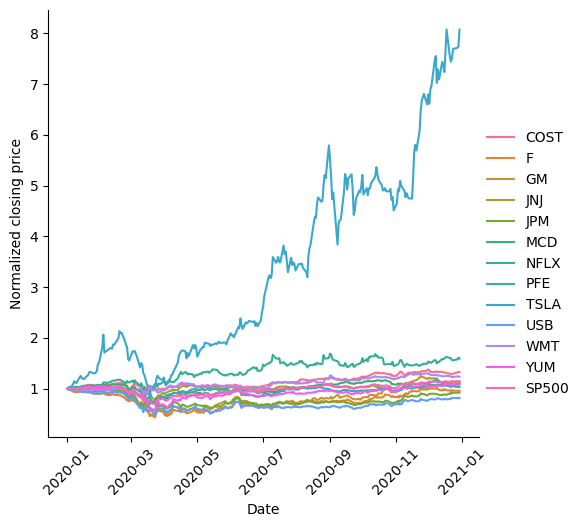

In [6]:
#%% Lineplot of stock prices

# normalize the initial stock price levels to 1
normalized_stock_levels = stock_levels_df['Adj Close']/stock_levels_df['Adj Close'].iloc[0]

g = sns.relplot(data=normalized_stock_levels,dashes = False,
                kind="line") # , palette="coolwarm"
g.set_xlabels('Date')
g.set_ylabels('Normalized closing price')
g.set_xticklabels(rotation=45)

Text(0.5, 1.0, '[y, X]')

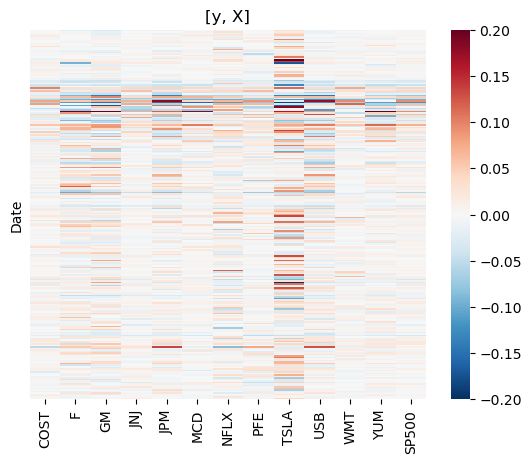

In [7]:
fig, ax = plt.subplots()
ax = sns.heatmap(y_X_df,
                 cmap='RdBu_r',
                 cbar_kws={"orientation": "vertical"}, 
                 yticklabels=False,
                 vmin = -0.2, vmax = 0.2)
plt.title('[y, X]')

(0.0, 45.0)

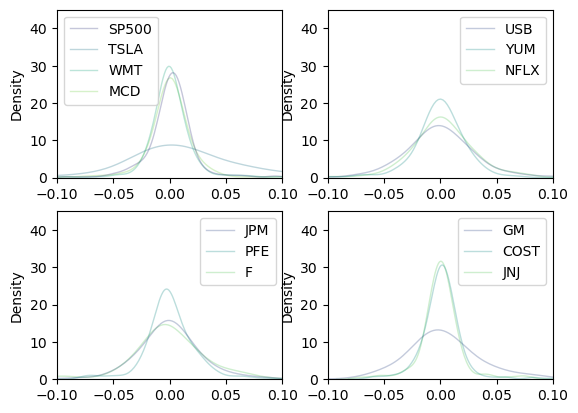

In [8]:
#%% distribution of column features of X

fig, axs = plt.subplots(2,2)

sns.kdeplot(ax = axs[0,0], 
            data=y_X_df[labels[0:4]],
            fill=False, 
            common_norm=False, 
            alpha=.3, linewidth=1,
            palette = "viridis")

axs[0,0].set_xlim([-0.1,0.1])
axs[0,0].set_ylim([0, 45])

sns.kdeplot(ax = axs[0,1], 
            data=y_X_df[labels[4:7]],
            fill=False, 
            common_norm=False, 
            alpha=.3, linewidth=1,
            palette = "viridis")

axs[0,1].set_xlim([-0.1,0.1])
axs[0,1].set_ylim([0, 45])

sns.kdeplot(ax = axs[1,0], 
            data=y_X_df[labels[7:10]],
            fill=False, 
            common_norm=False, 
            alpha=.3, linewidth=1,
            palette = "viridis")

axs[1,0].set_xlim([-0.1,0.1])
axs[1,0].set_ylim([0, 45])

sns.kdeplot(ax = axs[1,1], 
            data=y_X_df[labels[10:]],
            fill=False, 
            common_norm=False, 
            alpha=.3, linewidth=1,
            palette = "viridis")

axs[1,1].set_xlim([-0.1,0.1])
axs[1,1].set_ylim([0, 45])

In [9]:
#%% PCA

from sklearn.decomposition import PCA
pcamodel = PCA(n_components=4)
pca = pcamodel.fit_transform(X_df)

#%% Heatmap of V

V = pcamodel.components_.transpose()

Text(0.5, 1.0, 'V.T@V')

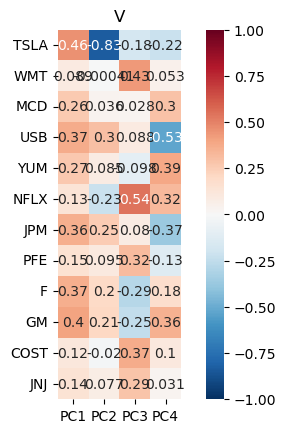

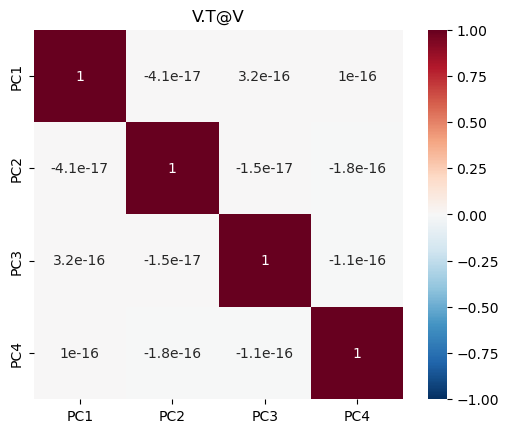

In [10]:
fig, ax = plt.subplots()
ax = sns.heatmap(V,
                 cmap='RdBu_r',
                 xticklabels=['PC1','PC2','PC3','PC4'],
                 yticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=1,
                 annot = True)
ax.set_aspect("equal")
plt.title('V')

fig, ax = plt.subplots()
ax = sns.heatmap(V.T@V,
                 cmap='RdBu_r',
                 xticklabels=['PC1','PC2','PC3','PC4'],
                 yticklabels=['PC1','PC2','PC3','PC4'],
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=1,
                 annot = True)
ax.set_aspect("equal")
plt.title('V.T@V')

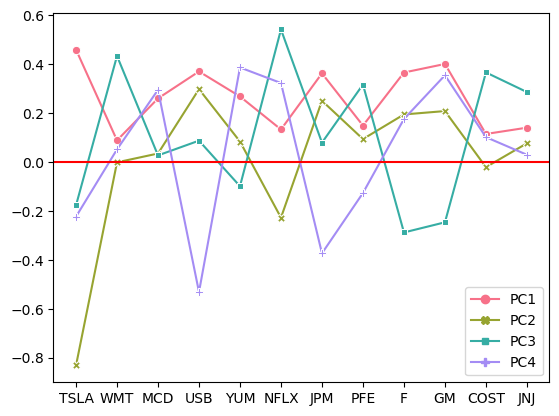

In [11]:
# Convert V array to dataframe
V_df = pd.DataFrame(data=V, 
                    columns = ['PC1','PC2','PC3','PC4'], 
                    index   = tickers[1:])

fig, ax = plt.subplots()
sns.lineplot(data=V_df,markers=True, dashes=False,palette = "husl")
plt.axhline(y=0, color='r', linestyle='-')

V_df.to_excel('V.xlsx')

In [12]:
#%%

#%% projected data, Z

Z_df = X_df@V

Z_df = Z_df.rename(columns={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4"})

Text(0.5, 1.0, 'Distribution of Z columns')

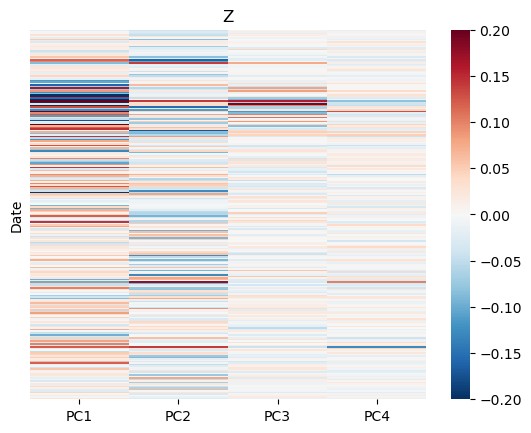

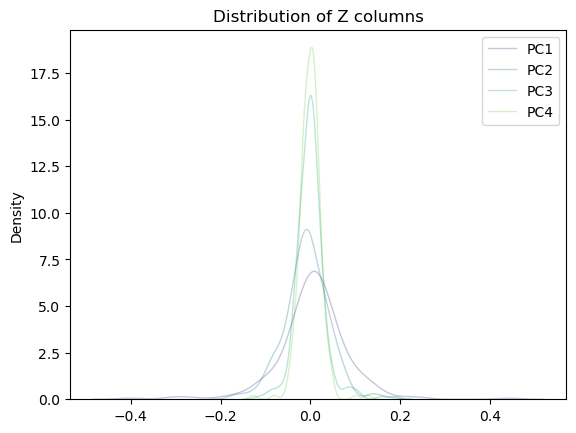

In [13]:
fig, ax = plt.subplots()
ax = sns.heatmap(Z_df,
                 cmap='RdBu_r',
                 cbar_kws={"orientation": "vertical"}, 
                 yticklabels=False,
                 vmin = -0.2, vmax = 0.2)
plt.title('Z')

# distribution of column features of Z

fig, ax = plt.subplots()
sns.kdeplot(data=Z_df,fill=False, 
            common_norm=False, 
            alpha=.3, linewidth=1,
            palette = "viridis")
plt.title('Distribution of Z columns')

#%% Scree plot

# pcamodel.explained_variance_
# pcamodel.explained_variance_ratio_

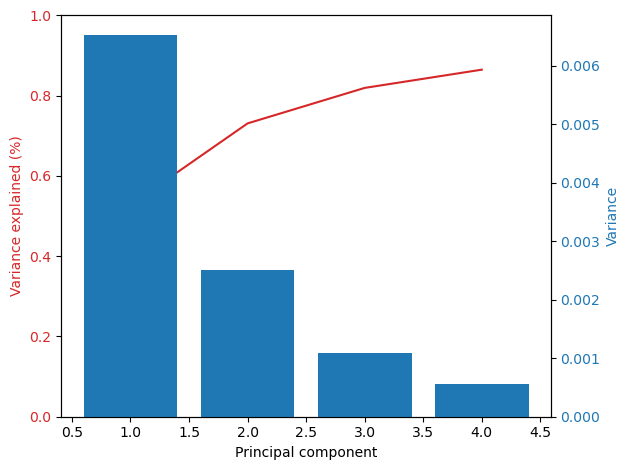

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Principal component')
ax1.set_ylabel('Variance explained (%)', color=color)
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_,),
         color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,1])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Variance', color=color)
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )

ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 

#%% Heatmap of covariance matrix

In [15]:
SIGMA_Z = Z_df.cov()

Text(0.5, 1.0, 'X_apx')

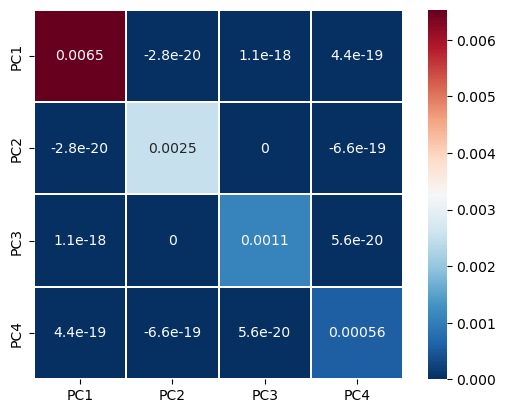

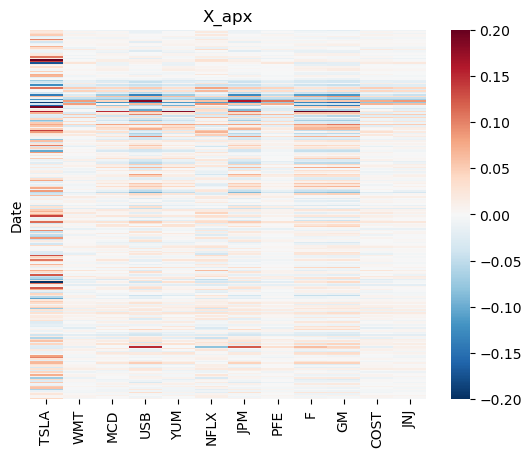

In [16]:
fig, axs = plt.subplots()

h = sns.heatmap(SIGMA_Z,cmap='RdBu_r', linewidths=.05, annot = True)
h.set_aspect("equal")

#%% approximate X

X_apx = Z_df@V.T

fig, ax = plt.subplots()
ax = sns.heatmap(X_apx,
                 cmap='RdBu_r',
                 cbar_kws={"orientation": "vertical"}, 
                 yticklabels=False,
                 xticklabels = labels[1:],
                 vmin = -0.2, vmax = 0.2)
plt.title('X_apx')

Text(0.5, 1.0, 'Error')

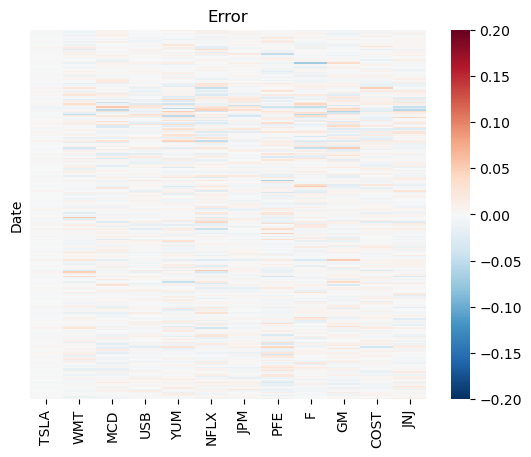

In [17]:
fig, ax = plt.subplots()
ax = sns.heatmap(X_df.to_numpy() - X_apx,
                 cmap='RdBu_r',
                 cbar_kws={"orientation": "vertical"}, 
                 yticklabels=False,
                 xticklabels = labels[1:],
                 vmin = -0.2, vmax = 0.2)
plt.title('Error')

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     759.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          4.39e-137
Time:                        20:21:27   Log-Likelihood:                 930.20
No. Observations:                 251   AIC:                            -1850.
Df Residuals:                     246   BIC:                            -1833.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.055      0.2

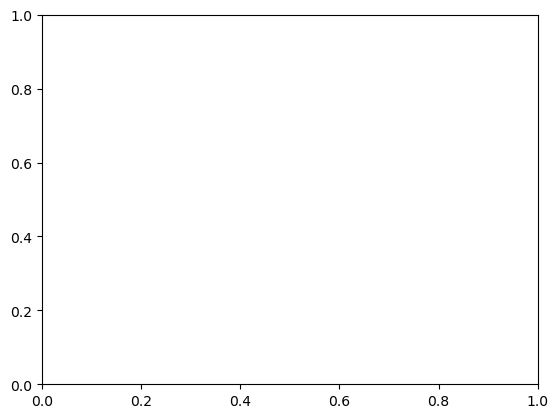

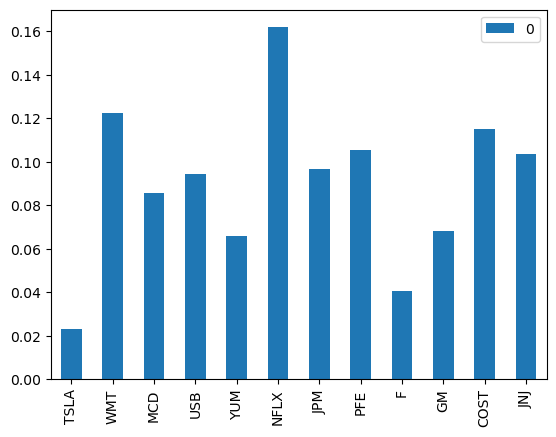

In [18]:
#%%

#%% Least square regression

import statsmodels.api as sm

# add a column of ones
Z_plus_1_df = sm.add_constant(Z_df)

model = sm.OLS(y_df, Z_plus_1_df)
results = model.fit()
print(results.summary())

p_Z = model.fit().params
print(p_Z)

#%% coefficients

b_Z = p_Z[1:].T
b_X = V@b_Z

b_X_df = pd.DataFrame(data=b_X.T, index = tickers[1:])

fig, ax = plt.subplots()
b_X_df.plot.bar()

b0 = y_df.mean() - X_df.mean().T@b_X

In [19]:
#%%

#%% increasing number of principal components

coeff_df = pd.DataFrame()
explained_array = []

num_PCs = [4,5,6,7,8,9]

for num_PC in num_PCs:
    
    pcamodel = PCA(n_components=num_PC)
    pca = pcamodel.fit_transform(X_df)
    V = pcamodel.components_.transpose()
    Z_df = X_df@V

    Z_plus_1_df = sm.add_constant(Z_df)
    model = sm.OLS(y_df, Z_plus_1_df)
    p_Z = model.fit().params
    
    b_Z = p_Z[1:].T
    b_X = V@b_Z
    b_X_df = pd.DataFrame(data=b_X.T, index = tickers[1:], columns = ['PC1~' + str(num_PC)])
    explained = np.sum(pcamodel.explained_variance_ratio_)
    print(explained)
    
    explained_array.append(explained)
    
    coeff_df = pd.concat([coeff_df, b_X_df], axis = 1)

0.8649744942884006
0.9065814359498245
0.9305102172698639
0.9520815742576642
0.9697735469227441
0.9791986678012605


<BarContainer object of 6 artists>

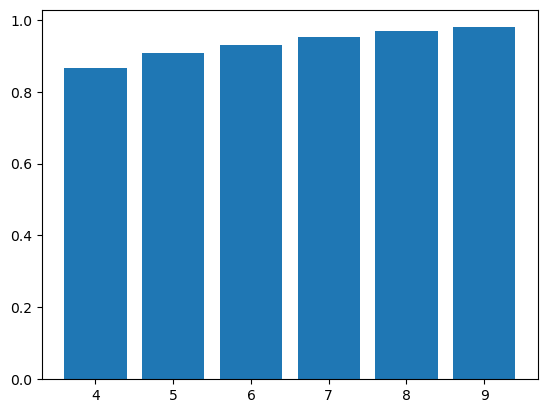

In [20]:
fig, ax = plt.subplots()
plt.bar(num_PCs, explained_array)

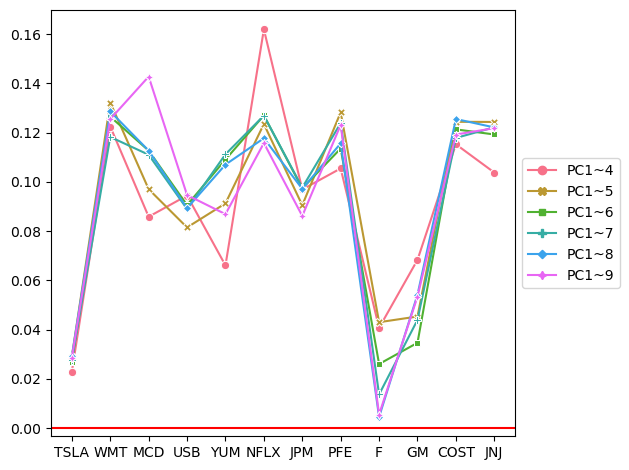

In [21]:
fig, ax = plt.subplots()
h = sns.lineplot(data=coeff_df,markers=True, dashes=False,palette = "husl")
plt.axhline(y=0, color='r', linestyle='-')
h.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

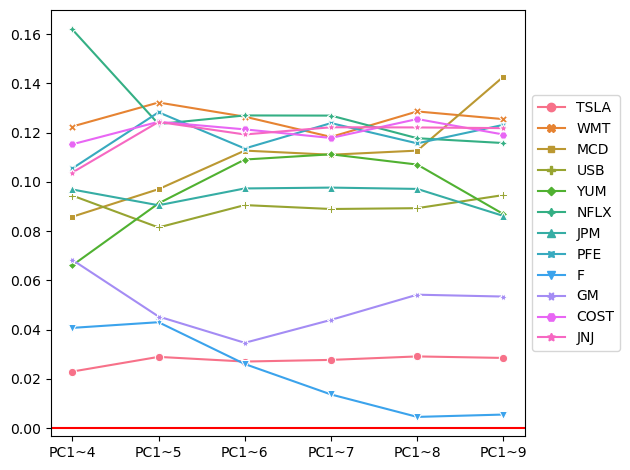

In [22]:
fig, ax = plt.subplots()
h = sns.lineplot(data=coeff_df.T,markers=True, dashes=False,palette = "husl")
plt.axhline(y=0, color='r', linestyle='-')
h.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()